In [137]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import os
# We need: 
# 5 x 2s video (30 fps, 36 x 36 pixels) for each T and L 
# T : [0.5, 1, 2, 4, 8, 16, 32] frames 
# L : [0.5, 1, 2, 4, 8, 16, 32] pixels

In [138]:
N_x = 10
N_y = 10
N_t = 10 
Ls = [0.5,1,2,4,8]
N_L = len(Ls)
Ts = [0.5,1,2,4,8]
N_T = len(Ts)
ids = [0,1,2,3,4]
N_it = len(ids)

results_dir = 'results/'
data_array = np.zeros((N_x, N_y, N_t, N_it, N_L, N_T))

# Load the results from the first file
for filename in os.listdir(results_dir):
    if filename.endswith('.npz'):
        results = np.load(results_dir + filename, allow_pickle=True)
        R = results['results']
        L_idx = results['L_idx']
        T_idx = results['T_idx']
        id = results['id']
        data_array[:,:,:,id,L_idx,T_idx] = R

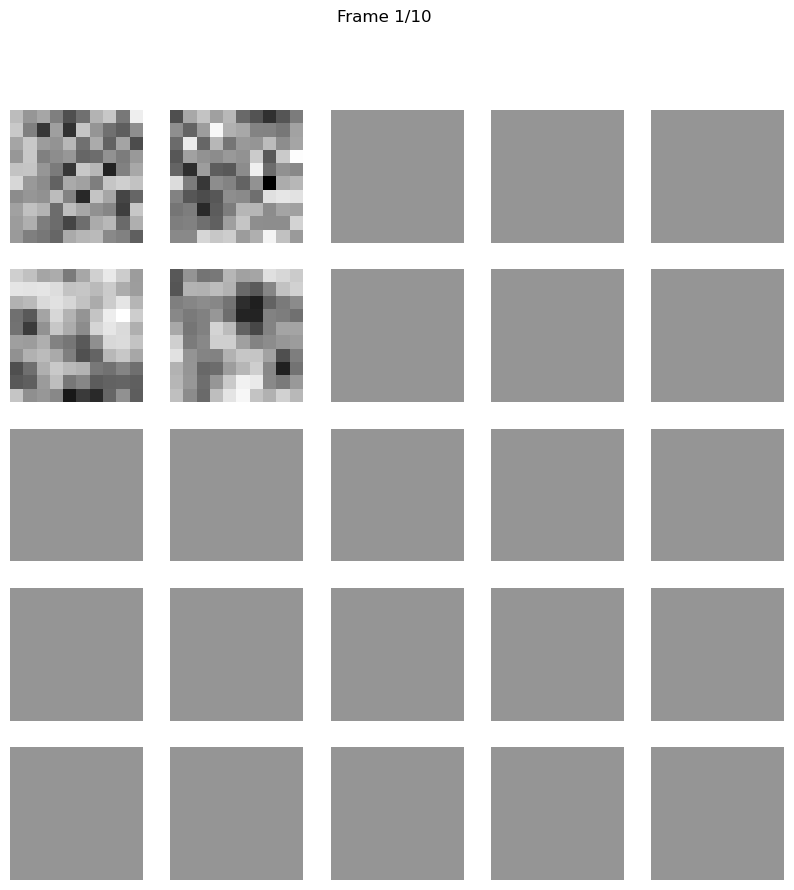

In [139]:

# Function to update the plot for each frame
def update(frame):
    fig = plt.gcf()  # Get the current figure
    #ax = fig.gca()  # Get the current axis
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].cla()
            ax[i,j].set_aspect('equal')
            ax[i,j].axis('off')
            ax[i,j].imshow(data_array[:,:,frame,0,i,j], cmap='Greys',vmin=-3,vmax=3)
    fig.suptitle(f'Frame {frame+1}/{N_t}')
# Initialize the figure
fig, ax = plt.subplots(N_L,N_T,figsize=(10,10))

# Create the animation
anim = FuncAnimation(fig, update, frames=N_t, interval=200)

# Show the animation using HTML
from IPython.display import HTML
HTML(anim.to_html5_video())